<a href="https://colab.research.google.com/github/ramikhouli/Oil-and-Gas-Data-Analysis/blob/main/Rami_Well128.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data description:
               DEPTH         HT90         DT       NPHI       RHOB       I-GR  \
count     65.000000    65.000000  65.000000  65.000000  65.000000  65.000000   
mean   10748.936923   659.788828  53.748968   0.029475   2.690126   0.181296   
std      257.209941   498.168911   2.419537   0.022299   0.056994   0.104112   
min    10532.200000    47.303400  49.179500   0.010000   2.421800   0.032592   
25%    10556.100000   222.331000  51.983600   0.016700   2.673900   0.102397   
50%    10574.100000   525.190000  52.770900   0.021700   2.696400   0.162211   
75%    11073.700000   937.755000  55.176000   0.032800   2.712300   0.246054   
max    11135.400000  1736.164000  60.640700   0.124200   2.815700   0.484701   

            CPOR     CPERMH  
count  65.000000  65.000000  
mean    0.024615   0.153923  
std     0.014445   0.643669  
min     0.001000   0.001000  
25%     0.014000   0.001000  
50%     0.020000   0.001000  
75%     0.033000   0.015000  
max     0.063000   3

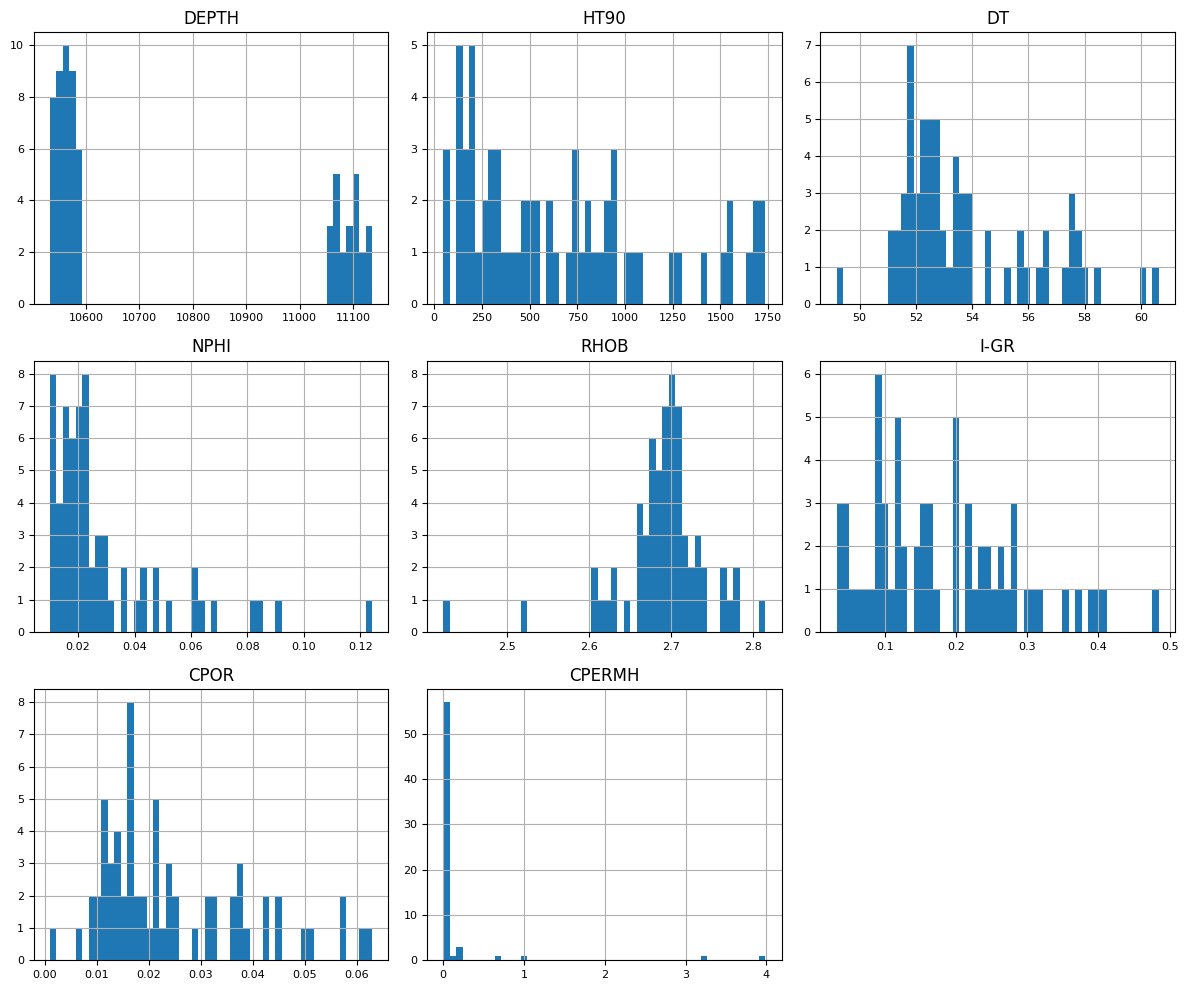

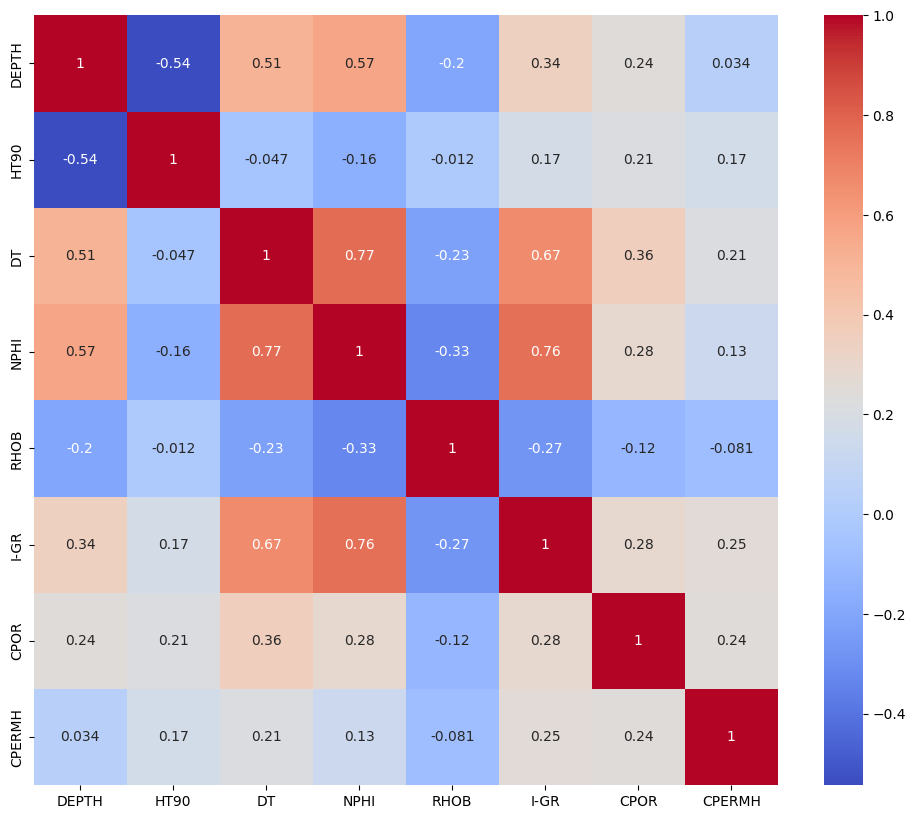

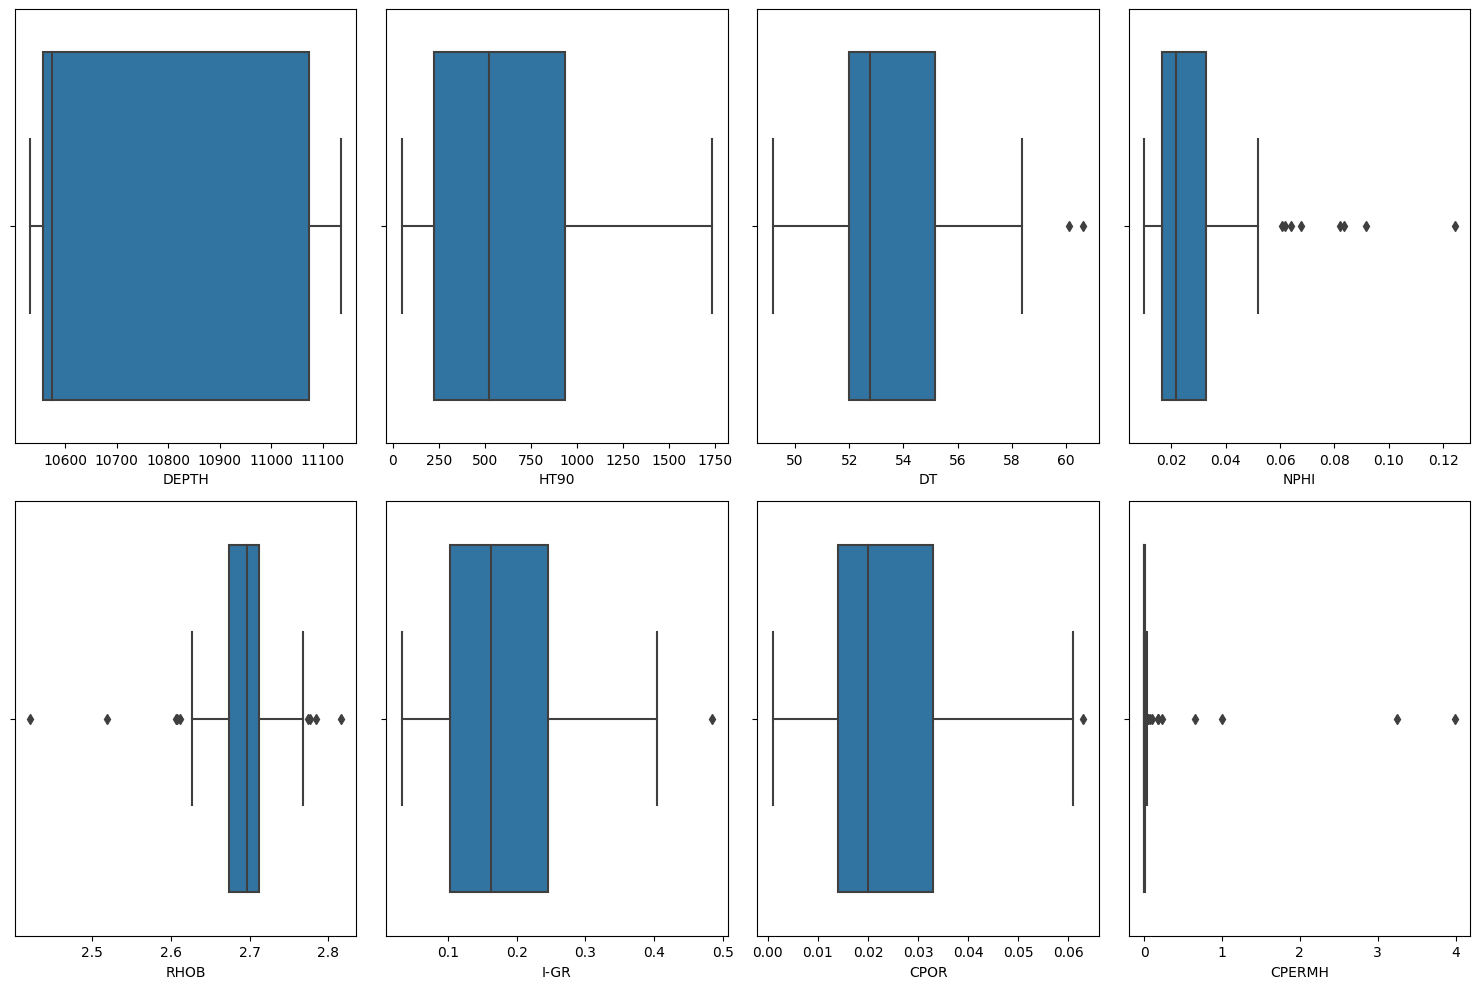

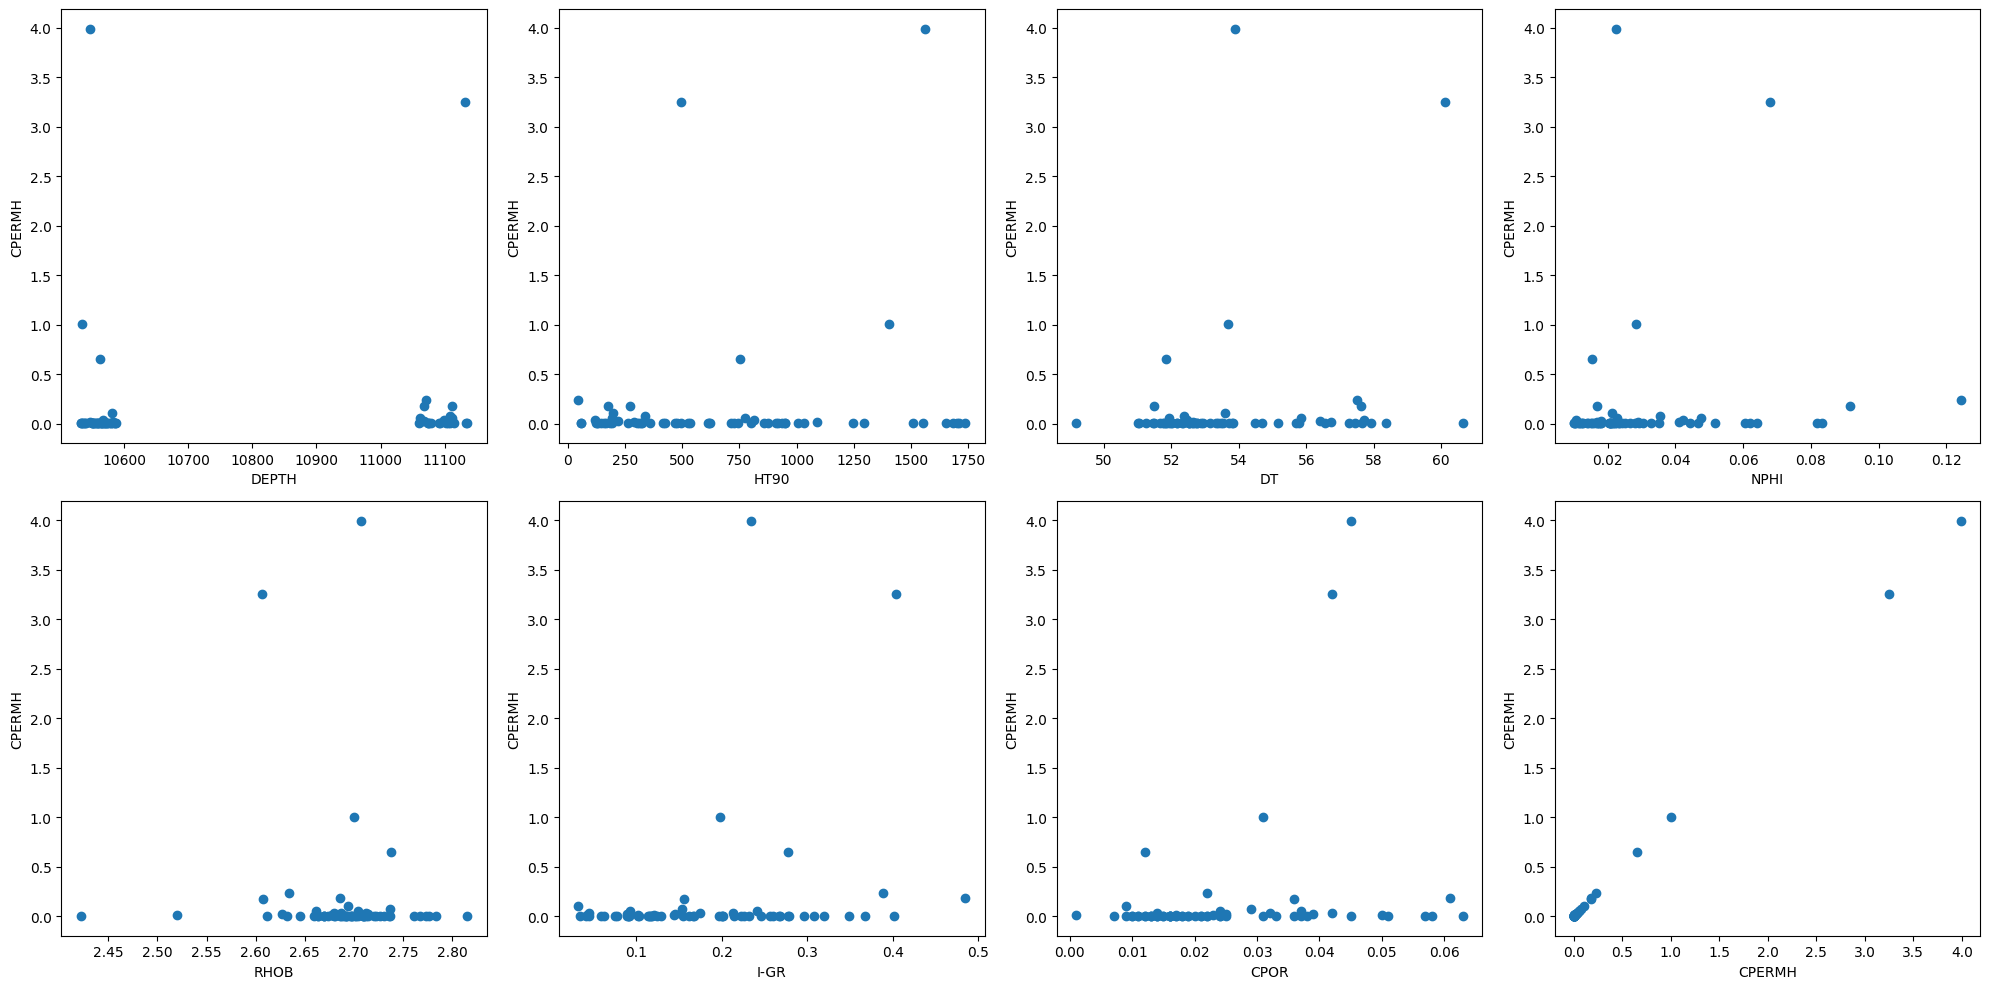


Mutual Information Scores:
   Feature  Mutual Information Score
5    I-GR                  0.023563
1    HT90                  0.019277
0   DEPTH                  0.000000
2      DT                  0.000000
3    NPHI                  0.000000
4    RHOB                  0.000000
6    CPOR                  0.000000


In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

# Load the excel file
xls = pd.ExcelFile('/content/All Wells Sor3a.xlsx')

# Load the specific sheet to a dataframe
df = xls.parse('Well 141')

# Describe the statistics of the data
print("Data description:\n", df.describe())

# Check for null values
print("\nNull value counts:\n", df.isnull().sum())

# Plot histograms for each variable
df.hist(figsize=(12, 10), bins=50, xlabelsize=8, ylabelsize=8)
plt.tight_layout()
plt.show()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

# Plot boxplots for each variable to check for outliers
fig, axs = plt.subplots(2, 4, figsize=(15, 10))
cols = df.columns
for i in range(2):
    for j in range(4):
        sns.boxplot(ax=axs[i, j], data=df, x=cols[i*4+j])
plt.tight_layout()
plt.show()

# Plot scatter plots for each feature vs the target variable CPERMH to check for linearity
fig, axs = plt.subplots(2, 4, figsize=(20, 10))
for i in range(2):
    for j in range(4):
        axs[i, j].scatter(df[cols[i*4+j]], df['CPERMH'])
        axs[i, j].set_xlabel(cols[i*4+j])
        axs[i, j].set_ylabel('CPERMH')
plt.tight_layout()
plt.show()

# Define the feature set and the target variable
X = df.drop(columns=['CPERMH'])
y = df['CPERMH']

# Define the feature selection method and fit to the data
selector = SelectKBest(mutual_info_regression, k='all')
selector.fit(X, y)

# Get the mutual info scores and create a dataframe
mi_scores = selector.scores_
mi_scores_df = pd.DataFrame({'Feature': X.columns, 'Mutual Information Score': mi_scores})

# Sort the dataframe based on the scores
mi_scores_df = mi_scores_df.sort_values(by='Mutual Information Score', ascending=False)

print("\nMutual Information Scores:\n", mi_scores_df)


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score

# Load the data
data = pd.read_excel('/content/All Wells Sor3a.xlsx')

# Define the feature variables and the target variable
X = data.drop('CPERMH', axis=1)
#X = data['CPOR']
#X = pd.DataFrame(X)
y = data['CPERMH']

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=365)

# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a MLPRegressor (Neural Network) model with the initial architecture and number of iterations
model_nn = MLPRegressor(hidden_layer_sizes=(80, 80), random_state=40002, max_iter=2000)
model_nn.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_nn = model_nn.predict(X_test_scaled)

# Compute the R^2 score
r2_nn = r2_score(y_test, y_pred_nn)
r2_nn


0.761668506783931

In [4]:
data

,DEPTH,HT90,DT,NPHI,RHOB,I-GR,CPOR,CPERMH
0,10533.1,344.278,51.7090,0.027419,2.65055,0.368112,0.014,0.07
1,10537.5,395.294,50.3517,0.015783,2.71135,0.061165,0.009,0.32
2,10542.0,202.495,50.7913,0.014403,2.69415,0.197790,0.012,0.21
3,10543.3,231.173,51.0852,0.013131,2.67467,0.148725,0.015,65.00
4,10544.1,291.285,50.4462,0.014100,2.67779,0.005890,0.007,0.21
...,...,...,...,...,...,...,...,...
131,11116.5,293.666,58.8661,0.051765,2.66486,0.126753,0.017,5.30
132,11118.6,239.163,58.0745,0.049684,2.65854,0.425522,0.023,0.41
133,11121.8,143.139,57.1691,0.053220,2.62546,0.414171,0.032,0.90
134,11133.5,289.116,57.6450,0.044899,2.64801,0.124163,0.008,0.28


In [5]:
y_pred_nn_t = model_nn.predict(X_train_scaled)
r2_nn = r2_score(y_train, y_pred_nn_t)
r2_nn

0.9999874235435747

In [6]:
from sklearn.preprocessing import PolynomialFeatures

# Define the feature variables
X = data.drop(['CPERMH', 'DEPTH'], axis=1)

# Create polynomial features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Convert to DataFrame
X_poly_df = pd.DataFrame(X_poly, columns=poly.get_feature_names_out(X.columns))

# Display the first few rows of the dataframe
pd.options.display.max_columns = None
X_poly_df.head()


,1,HT90,DT,NPHI,RHOB,I-GR,CPOR,HT90^2,HT90 DT,HT90 NPHI,HT90 RHOB,HT90 I-GR,HT90 CPOR,DT^2,DT NPHI,DT RHOB,DT I-GR,DT CPOR,NPHI^2,NPHI RHOB,NPHI I-GR,NPHI CPOR,RHOB^2,RHOB I-GR,RHOB CPOR,I-GR^2,I-GR CPOR,CPOR^2
0,1.0,344.278,51.7090,0.027419,2.65055,0.368112,0.014,118527.341284,17802.271102,9.439724,912.526053,126.733029,4.819892,2673.820681,1.417804,137.057290,19.034728,0.723926,0.000752,0.072675,0.010093,0.000384,7.025415,0.975701,0.037108,0.135507,0.005154,0.000196
1,1.0,395.294,50.3517,0.015783,2.71135,0.061165,0.009,156257.346436,19903.724900,6.238728,1071.780387,24.178167,3.557646,2535.293693,0.794676,136.521082,3.079763,0.453165,0.000249,0.042792,0.000965,0.000142,7.351419,0.165840,0.024402,0.003741,0.000550,0.000081
2,1.0,202.495,50.7913,0.014403,2.69415,0.197790,0.012,41004.225025,10284.984293,2.916576,545.551904,40.051499,2.429940,2579.756156,0.731557,136.839381,10.046014,0.609496,0.000207,0.038804,0.002849,0.000173,7.258444,0.532876,0.032330,0.039121,0.002373,0.000144
3,1.0,231.173,51.0852,0.013131,2.67467,0.148725,0.015,53440.955929,11809.518940,3.035533,618.311488,34.381198,3.467595,2609.697659,0.670800,136.636052,7.597645,0.766278,0.000172,0.035121,0.001953,0.000197,7.153860,0.397790,0.040120,0.022119,0.002231,0.000225
4,1.0,291.285,50.4462,0.014100,2.67779,0.005890,0.007,84846.951225,14694.221367,4.107060,780.000060,1.715576,2.038995,2544.819094,0.711281,135.084330,0.297112,0.353123,0.000199,0.037756,0.000083,0.000099,7.170559,0.015771,0.018745,0.000035,0.000041,0.000049


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score

# Add the 'DEPTH' column back in
X_poly_df['DEPTH'] = data['DEPTH']

# Define the target variable
y = data['CPERMH']

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X_poly_df, y, test_size=0.2, random_state=365)

# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a MLPRegressor (Neural Network) model with the initial architecture and number of iterations
model_nn = MLPRegressor(hidden_layer_sizes=(120, 100), random_state=365, max_iter=2000)
model_nn.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_nn = model_nn.predict(X_test_scaled)

# Compute the R^2 score
r2_nn = r2_score(y_test, y_pred_nn)
r2_nn


0.8889590293377653

In [8]:
# Predict on the training set
y_train_pred_nn = model_nn.predict(X_train_scaled)

# Compute the R^2 score
r2_nn_train = r2_score(y_train, y_train_pred_nn)
r2_nn_train


0.999986756802701

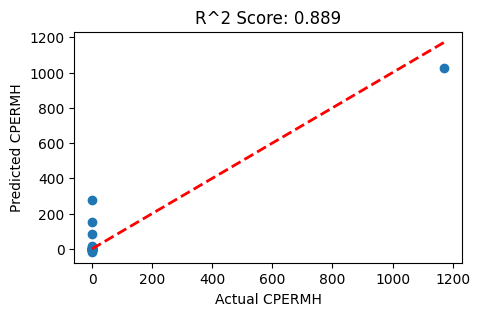

In [9]:
# Plot the predicted vs actual values for the sample of the test set with a smaller figure size
import matplotlib.pyplot as plt #(#visuals,graphs)
import numpy as np
sample_size = 20
y_pred_nn_df = pd.DataFrame(y_pred_nn, index=y_test.index, columns=['Predicted CPERMH'])
sample_indices = np.random.choice(y_test.index, size=sample_size, replace=False)
plt.figure(figsize=(5, 3))
plt.scatter(y_test[sample_indices], y_pred_nn_df.loc[sample_indices, 'Predicted CPERMH'])
plt.xlabel('Actual CPERMH')
plt.ylabel('Predicted CPERMH')
plt.title(f'R^2 Score: {r2_nn:.3f}')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', lw=2)
plt.show()


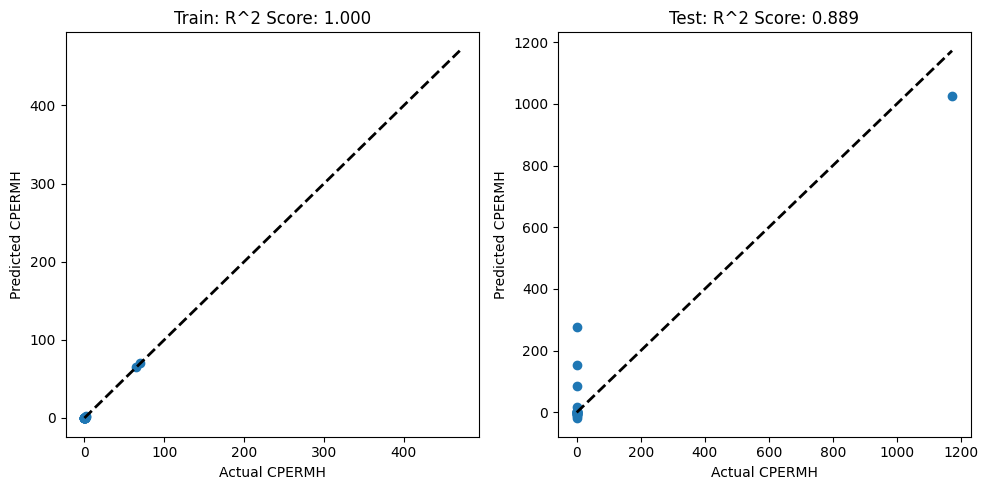

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Create a dataframe for the training predictions
y_train_pred_nn_df = pd.DataFrame(y_train_pred_nn, index=y_train.index, columns=['Predicted CPERMH'])

# Random indices for samples from the training set
sample_indices_train = np.random.choice(y_train.index, size=sample_size, replace=False)

# Create a figure
plt.figure(figsize=(10, 5))

# First subplot for the training data
plt.subplot(1, 2, 1)
plt.scatter(y_train[sample_indices_train], y_train_pred_nn_df.loc[sample_indices_train, 'Predicted CPERMH'])
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.xlabel('Actual CPERMH')
plt.ylabel('Predicted CPERMH')
plt.title(f'Train: R^2 Score: {r2_nn_train:.3f}')

# Second subplot for the test data
plt.subplot(1, 2, 2)
plt.scatter(y_test[sample_indices], y_pred_nn_df.loc[sample_indices, 'Predicted CPERMH'])
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual CPERMH')
plt.ylabel('Predicted CPERMH')
plt.title(f'Test: R^2 Score: {r2_nn:.3f}')

# Show the plot
plt.tight_layout()
plt.show()


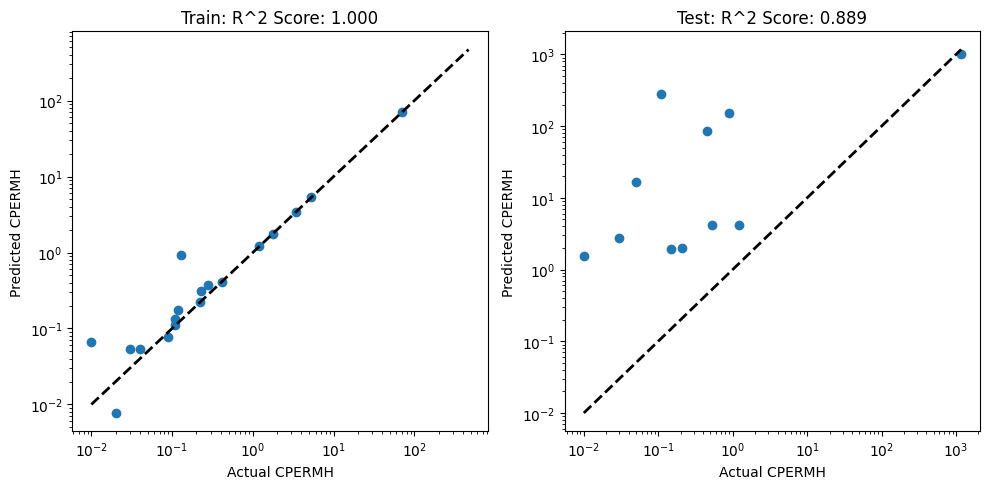

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Create a dataframe for the training predictions
y_train_pred_nn_df = pd.DataFrame(y_train_pred_nn, index=y_train.index, columns=['Predicted CPERMH'])

# Random indices for samples from the training set
sample_indices_train = np.random.choice(y_train.index, size=sample_size, replace=False)

# Create a figure
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# First subplot for the training data
axs[0].scatter(y_train[sample_indices_train], y_train_pred_nn_df.loc[sample_indices_train, 'Predicted CPERMH'])
axs[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].set_xlabel('Actual CPERMH')
axs[0].set_ylabel('Predicted CPERMH')
axs[0].set_title(f'Train: R^2 Score: {r2_nn_train:.3f}')

# Second subplot for the test data
axs[1].scatter(y_test[sample_indices], y_pred_nn_df.loc[sample_indices, 'Predicted CPERMH'])
axs[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[1].set_xlabel('Actual CPERMH')
axs[1].set_ylabel('Predicted CPERMH')
axs[1].set_title(f'Test: R^2 Score: {r2_nn:.3f}')

# Show the plot
plt.tight_layout()
plt.show()


In [14]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

# Calculate metrics for the training set
r2_train = r2_score(y_train, y_train_pred_nn)
mae_train = mean_absolute_error(y_train, y_train_pred_nn)
mse_train = mean_squared_error(y_train, y_train_pred_nn)
rmse_train = np.sqrt(mse_train)
mape_train = mean_absolute_percentage_error(y_train, y_train_pred_nn)

# Calculate metrics for the test set
r2_test = r2_score(y_test, y_pred_nn)
mae_test = mean_absolute_error(y_test, y_pred_nn)
mse_test = mean_squared_error(y_test, y_pred_nn)
rmse_test = np.sqrt(mse_test)
mape_test = mean_absolute_percentage_error(y_test, y_pred_nn)

# Create a DataFrame to display the metrics
metrics_df = pd.DataFrame({
    'Metric': ['R^2'],
    'Train': [r2_train],
    'Test': [r2_test]
})

metrics_df


,Metric,Train,Test
0,R^2,0.999987,0.888959


In [15]:
# Create a DataFrame to display the metrics
metrics_df = pd.DataFrame({
    'Metric': ['R^2', 'MAE', 'MSE', 'RMSE', 'MAPE'],
    'Train': [r2_train, mae_train, mse_train, rmse_train, mape_train],
    'Test': [r2_test, mae_test, mse_test, rmse_test, mape_test]
})

print(metrics_df)


  Metric     Train         Test
0    R^2  0.999987     0.888959
1    MAE  0.094187    35.641126
2    MSE  0.034508  5250.486617
3   RMSE  0.185763    72.460242
4   MAPE  1.113922   214.525134


In [11]:
import pandas as pd

# Load the Excel file
xls = pd.ExcelFile('/content/All Wells Sor3a.xlsx')

# Initialize an empty dataframe
df = pd.DataFrame()

# Loop over all sheet names
for sheet_name in xls.sheet_names:
    # Skip the 'Dictionary' sheet
    if sheet_name == 'Dictionary':
        continue

    # Read each sheet into a dataframe
    df_sheet = pd.read_excel(xls, sheet_name)

    # Add a new column with the sheet name
    df_sheet['Data_source'] = sheet_name

    # Append this data to the main dataframe
    df = pd.concat([df, df_sheet])

# Reset the index
df.reset_index(drop=True, inplace=True)

# Move 'Sheet' column to the first position
df = df[ ['Data_source'] + [ col for col in df.columns if col != 'Data_source' ] ]

# Create a dictionary to map the 'Sheet' names to labels
encode_dict = {'Well 128': 0, 'Well 141': 1, 'Analysis (2)': 2}

# Replace the 'Sheet' names with the corresponding labels
df['Data_source'] = df['Data_source'].map(encode_dict)

In [ ]:
df

,Data_source,DEPTH,HT90,DT,NPHI,RHOB,I-GR,CPOR,CPERMH
0,0,10533.100000,344.278,51.7090,0.027419,2.65055,0.368112,0.014,0.070
1,0,10537.500000,395.294,50.3517,0.015783,2.71135,0.061165,0.009,0.320
2,0,10542.000000,202.495,50.7913,0.014403,2.69415,0.197790,0.012,0.210
3,0,10543.300000,231.173,51.0852,0.013131,2.67467,0.148725,0.015,65.000
4,0,10544.100000,291.285,50.4462,0.014100,2.67779,0.005890,0.007,0.210
...,...,...,...,...,...,...,...,...,...
356,2,12408.090692,150.832,57.3152,0.058016,2.67781,0.296245,0.019,0.015
357,2,12413.878848,117.555,51.4667,0.051940,2.66034,0.203143,0.011,0.008
358,2,12416.972518,139.205,53.0888,0.060549,2.63782,0.234054,0.026,0.006
359,2,12417.920578,132.321,51.0636,0.058823,2.62154,0.213181,0.036,0.008
